In [33]:
# Kütüphaneleri içe aktarma
import pandas as pd # veri aktarma
import numpy as np # array islemi
import warnings # uyarı
from sklearn.impute import KNNImputer # kumeleme ile eksik verileri doldurma
from datetime import datetime # datetime formatına cevirme
import matplotlib.pyplot as plt # gorsellestirme
import seaborn as sns # gorsellestirme

In [2]:
# uyarıları gizleme
warnings.filterwarnings('ignore') 

In [4]:
# Veriyi alma ve görme
side_effect_df= pd.read_excel("Data/side_effect_data.xlsx")
side_effect_df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [5]:
# satır, sütun sayısını görme
side_effect_df.shape

(2357, 19)

In [6]:
# Veri türlerini görüntüleme
print(side_effect_df.dtypes)

Kullanici_id                                 int64
Cinsiyet                                    object
Dogum_Tarihi                        datetime64[ns]
Uyruk                                       object
Il                                          object
Ilac_Adi                                    object
Ilac_Baslangic_Tarihi               datetime64[ns]
Ilac_Bitis_Tarihi                   datetime64[ns]
Yan_Etki                                    object
Yan_Etki_Bildirim_Tarihi            datetime64[ns]
Alerjilerim                                 object
Kronik Hastaliklarim                        object
Baba Kronik Hastaliklari                    object
Anne Kronik Hastaliklari                    object
Kiz Kardes Kronik Hastaliklari              object
Erkek Kardes Kronik Hastaliklari            object
Kan Grubu                                   object
Kilo                                       float64
Boy                                        float64
dtype: object


In [8]:
#Kolon isimlerinin düzeltilmesi
side_effect_df.columns = [
    "Kullanici_Id",
    "Cinsiyet",
    "Dogum_Tarihi",
    "Uyruk",
    "Il", 
    "Ilac_Adi",
    "Ilac_Baslangic_Tarihi",
    "Ilac_Bitis_Tarihi",
    "Yan_Etki",
    "Yan_Etki_Bildirim_Tarihi",
    "Alerjilerim",
    "Kronik_Hastaliklarim",
    "Baba_Kronik_Hastaliklari",
    "Anne_Kronik_Hastaliklari",
    "Kiz_Kardes_Kronik_Hastaliklari",
    "Erkek_Kardes_Kronik_Hastaliklari",
    "Kan_Grubu",
    "Kilo",
    "Boy"
]

In [7]:
"""
Kronik_Hastaliklarim, Baba_Kronik_Hastaliklari, Anne_Kronik_Hastaliklari, Kiz_Kardes_Kronik_Hastaliklari, Erkek_Kardes_Kronik_Hastaliklari kolonlarında birden fazla değer olması veri analizinde sorun yaratabilir bu sorunlar;
- Analiz Kolaylığı
- Modelleme
- Görselleştirme olabilmektedir. 
Bu nedenle verilerin tek satır halinen getirlmesi gerekir.
"""
def explode_column(df, column_name): 
    df = df.copy()
    df[column_name] = df[column_name].fillna('') # NaN değerleri boş string ile doldurma
    df[column_name] = df[column_name].apply(lambda x: x.split(", ") if x else [])
    return df.explode(column_name)

In [9]:
# Kolonu ayırma
baba_kronik_hastaliklari_df = explode_column(side_effect_df, 'Baba_Kronik_Hastaliklari')

In [10]:
anne_kronik_hastaliklari_df = explode_column(baba_kronik_hastaliklari_df, 'Anne_Kronik_Hastaliklari')

In [11]:
kiz_kardes_kronik_hastaliklari_df = explode_column(anne_kronik_hastaliklari_df, 'Kiz_Kardes_Kronik_Hastaliklari')

In [12]:
erkek_kardes_kronik_hastaliklari_df = explode_column(kiz_kardes_kronik_hastaliklari_df, 'Erkek_Kardes_Kronik_Hastaliklari')

In [13]:
# son olarak Kronik_Hastaliklarim kolonu
side_effect_data = explode_column(erkek_kardes_kronik_hastaliklari_df, 'Kronik_Hastaliklarim')

In [14]:
side_effect_data.head()

,Kullanici_Id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik_Hastaliklarim,Baba_Kronik_Hastaliklari,Anne_Kronik_Hastaliklari,Kiz_Kardes_Kronik_Hastaliklari,Erkek_Kardes_Kronik_Hastaliklari,Kan_Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Hipertansiyon,Guatr,KOAH,Kemik Erimesi,Kemik Erimesi,B RH-,103.0,191.0
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Kan Hastaliklari,Guatr,KOAH,Kemik Erimesi,Kemik Erimesi,B RH-,103.0,191.0
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Hipertansiyon,Guatr,KOAH,Kemik Erimesi,Guatr,B RH-,103.0,191.0
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Kan Hastaliklari,Guatr,KOAH,Kemik Erimesi,Guatr,B RH-,103.0,191.0
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,Hipertansiyon,Guatr,KOAH,Kalp Hastaliklari,Kemik Erimesi,B RH-,103.0,191.0


In [15]:
# ayırma işleminden sonra; satır, sutun sayısı
side_effect_data.shape

(37016, 19)

In [16]:
# Kolonlarda Boş ve NoN değerlerin sayısını görme
side_effect_data.isna().sum()

Kullanici_Id                            0
Cinsiyet                            12790
Dogum_Tarihi                            0
Uyruk                                   0
Il                                   3020
Ilac_Adi                                0
Ilac_Baslangic_Tarihi                   0
Ilac_Bitis_Tarihi                       0
Yan_Etki                                0
Yan_Etki_Bildirim_Tarihi                0
Alerjilerim                          7342
Kronik_Hastaliklarim                 3524
Baba_Kronik_Hastaliklari             1238
Anne_Kronik_Hastaliklari             1820
Kiz_Kardes_Kronik_Hastaliklari        812
Erkek_Kardes_Kronik_Hastaliklari     1104
Kan_Grubu                            5648
Kilo                                 4196
Boy                                  1904
dtype: int64

In [17]:
# Cinsiyet ve Alerjilerim kolonlarındaki eksik verileri içeren satırları kaldırma
side_effect_data = side_effect_data.dropna(subset=['Cinsiyet', 'Alerjilerim'])

In [18]:
#Kilo ve Boy için mode ile doldurma
side_effect_data['Kilo'].fillna(side_effect_data['Kilo'].mode(), inplace=True)
side_effect_data['Boy'].fillna(side_effect_data['Boy'].mode(), inplace=True)

In [19]:
side_effect_data = side_effect_data.dropna(subset=['Il', 'Kan_Grubu', 'Kronik_Hastaliklarim', 'Baba_Kronik_Hastaliklari', 'Anne_Kronik_Hastaliklari', 'Kiz_Kardes_Kronik_Hastaliklari', 'Erkek_Kardes_Kronik_Hastaliklari'])

In [20]:
side_effect_data.isna().sum()

Kullanici_Id                           0
Cinsiyet                               0
Dogum_Tarihi                           0
Uyruk                                  0
Il                                     0
Ilac_Adi                               0
Ilac_Baslangic_Tarihi                  0
Ilac_Bitis_Tarihi                      0
Yan_Etki                               0
Yan_Etki_Bildirim_Tarihi               0
Alerjilerim                            0
Kronik_Hastaliklarim                   0
Baba_Kronik_Hastaliklari               0
Anne_Kronik_Hastaliklari               0
Kiz_Kardes_Kronik_Hastaliklari         0
Erkek_Kardes_Kronik_Hastaliklari       0
Kan_Grubu                              0
Kilo                                1240
Boy                                  464
dtype: int64

In [22]:
# Kümeleme algoritmaları kullanarak benzer özelliklere sahip verileri gruplayabilir
# ve eksik verileri bu gruptan tahmin edilebilir.

# Kilo ve Boy özellikleri için KNNImputer kullanma
imputer = KNNImputer(n_neighbors=5)

In [23]:
side_effect_data[['Kilo', 'Boy']] = imputer.fit_transform(side_effect_data[['Kilo', 'Boy']])

In [24]:
# son durumda boş ve NaN değerler kalmamıştır
side_effect_data.isna().sum()

Kullanici_Id                        0
Cinsiyet                            0
Dogum_Tarihi                        0
Uyruk                               0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik_Hastaliklarim                0
Baba_Kronik_Hastaliklari            0
Anne_Kronik_Hastaliklari            0
Kiz_Kardes_Kronik_Hastaliklari      0
Erkek_Kardes_Kronik_Hastaliklari    0
Kan_Grubu                           0
Kilo                                0
Boy                                 0
dtype: int64

In [25]:
# Kategorik kolonların belirlenmesi
categorical_columns = side_effect_data.select_dtypes(include=['object', 'category']).columns

In [26]:
categorical_columns

Index(['Cinsiyet', 'Uyruk', 'Il', 'Ilac_Adi', 'Yan_Etki', 'Alerjilerim',
       'Kronik_Hastaliklarim', 'Baba_Kronik_Hastaliklari',
       'Anne_Kronik_Hastaliklari', 'Kiz_Kardes_Kronik_Hastaliklari',
       'Erkek_Kardes_Kronik_Hastaliklari', 'Kan_Grubu'],
      dtype='object')

In [27]:
# Her bir kategorik kolonda kaç tane benzersiz değerin oldugu bilgisi
# Burada yapılacak işlem aslında 
for column in categorical_columns:
    unique_values_count = side_effect_data[column].nunique()
    print(f'{column} kolonunda {unique_values_count} benzersiz kategori var.')

Cinsiyet kolonunda 2 benzersiz kategori var.
Uyruk kolonunda 1 benzersiz kategori var.
Il kolonunda 13 benzersiz kategori var.
Ilac_Adi kolonunda 147 benzersiz kategori var.
Yan_Etki kolonunda 22 benzersiz kategori var.
Alerjilerim kolonunda 23 benzersiz kategori var.
Kronik_Hastaliklarim kolonunda 11 benzersiz kategori var.
Baba_Kronik_Hastaliklari kolonunda 11 benzersiz kategori var.
Anne_Kronik_Hastaliklari kolonunda 12 benzersiz kategori var.
Kiz_Kardes_Kronik_Hastaliklari kolonunda 12 benzersiz kategori var.
Erkek_Kardes_Kronik_Hastaliklari kolonunda 12 benzersiz kategori var.
Kan_Grubu kolonunda 8 benzersiz kategori var.


In [29]:
# Uyruk kolonunda sadece 'Türkiye' verisi vardır. Modelin performanısını ya da analiz sonuçlarını etkilemeyeceğini için bu kolon çıkartıldı.
side_effect_data.drop(columns=['Uyruk'], inplace=True)

In [31]:
# Doğum_Tarihi kolonunu datetime formatına çevirme
side_effect_data['Dogum_Tarihi'] = pd.to_datetime(side_effect_data['Dogum_Tarihi'], format='%Y-%m-%d')

# Bugünkü tarihi alma
today = datetime.today()

# Yaş kolonunu hesapla
side_effect_data['Yas'] = side_effect_data['Dogum_Tarihi'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

# Sonuçları görmek için ilk 5 satırı göster
side_effect_data[['Dogum_Tarihi', 'Yas']].head()

,Dogum_Tarihi,Yas
0,1960-03-01,64
0,1960-03-01,64
0,1960-03-01,64
0,1960-03-01,64
0,1960-03-01,64


In [32]:
# Dogum_Tarihi kolonunun silinmesi
side_effect_data.drop(columns=['Dogum_Tarihi'], inplace=True)

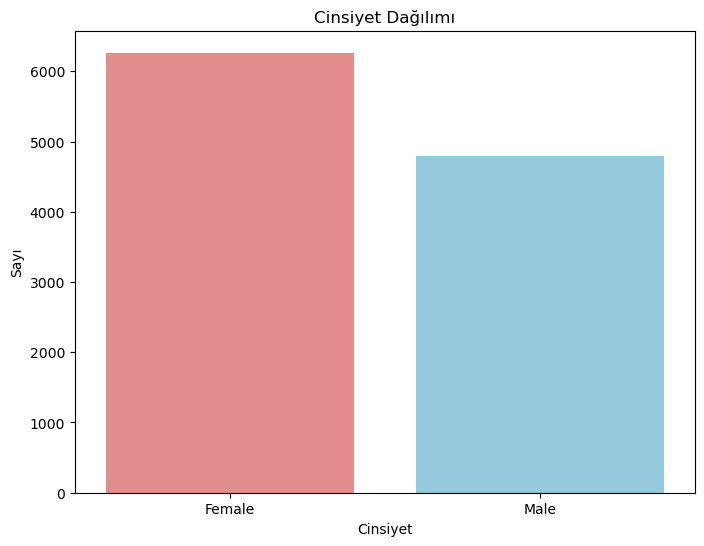

In [39]:
# Cinsiyet dağılımını görselleştirme
custom_palette = {'Male': 'skyblue', 'Female': 'lightcoral'}
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Cinsiyet', data = side_effect_data, order = side_effect_data['Cinsiyet'].value_counts().index, palette = custom_palette)
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')
plt.show()

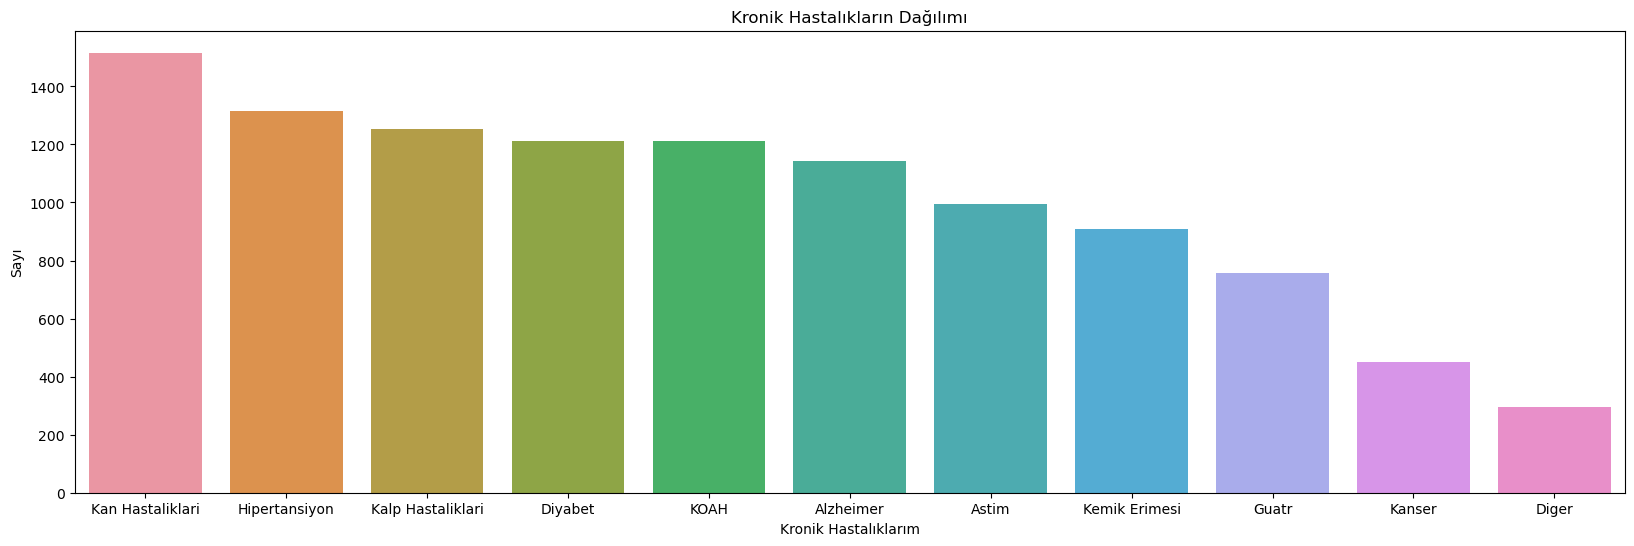

In [40]:
# Kronik hastalıkların dağılımını görselleştirme
plt.figure(figsize=(20, 6))
sns.countplot(x='Kronik_Hastaliklarim', data=side_effect_data, order=side_effect_data['Kronik_Hastaliklarim'].value_counts().index)
plt.title('Kronik Hastalıkların Dağılımı')
plt.xlabel('Kronik Hastalıklarım')
plt.ylabel('Sayı')
plt.show()

In [42]:
# Yaş aralıklarına göre gruplama
side_effect_data['Yas_Grubu'] = pd.cut(side_effect_data['Yas'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+'])

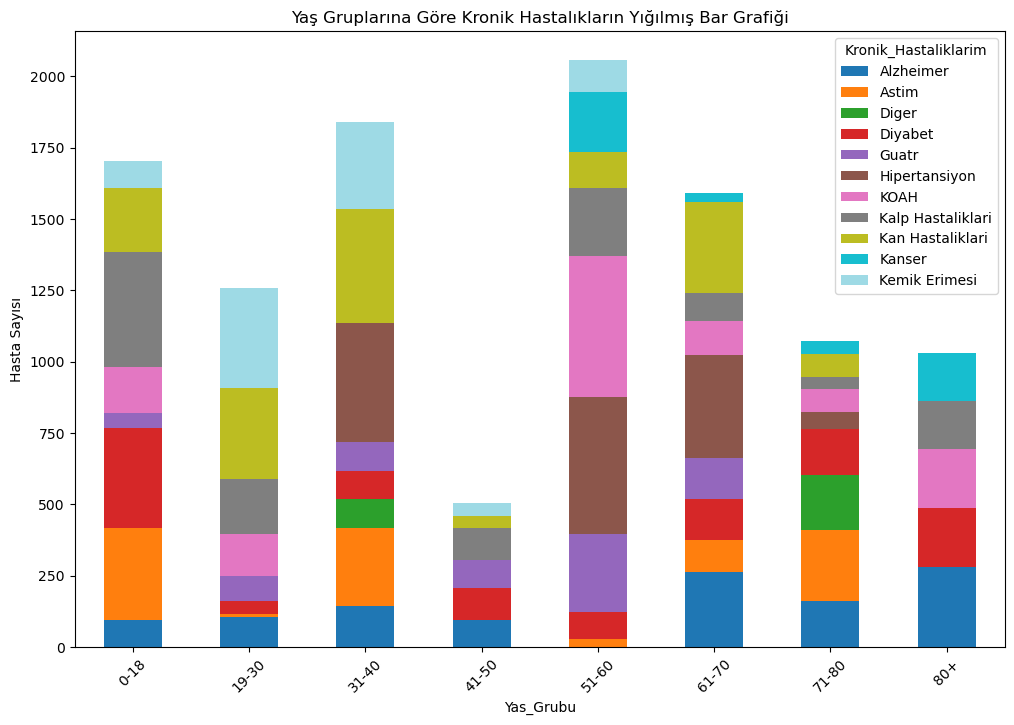

In [43]:
# Yaş grubu ve kronik hastalıkları pivot tabloya çevirme
pivot_data = side_effect_data.pivot_table(index='Yas_Grubu', columns='Kronik_Hastaliklarim', aggfunc='size', fill_value=0)

# Yığılmış bar grafiği
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), cmap="tab20")
plt.title('Yaş Gruplarına Göre Kronik Hastalıkların Yığılmış Bar Grafiği')
plt.ylabel('Hasta Sayısı')
plt.xticks(rotation=45)
plt.show()

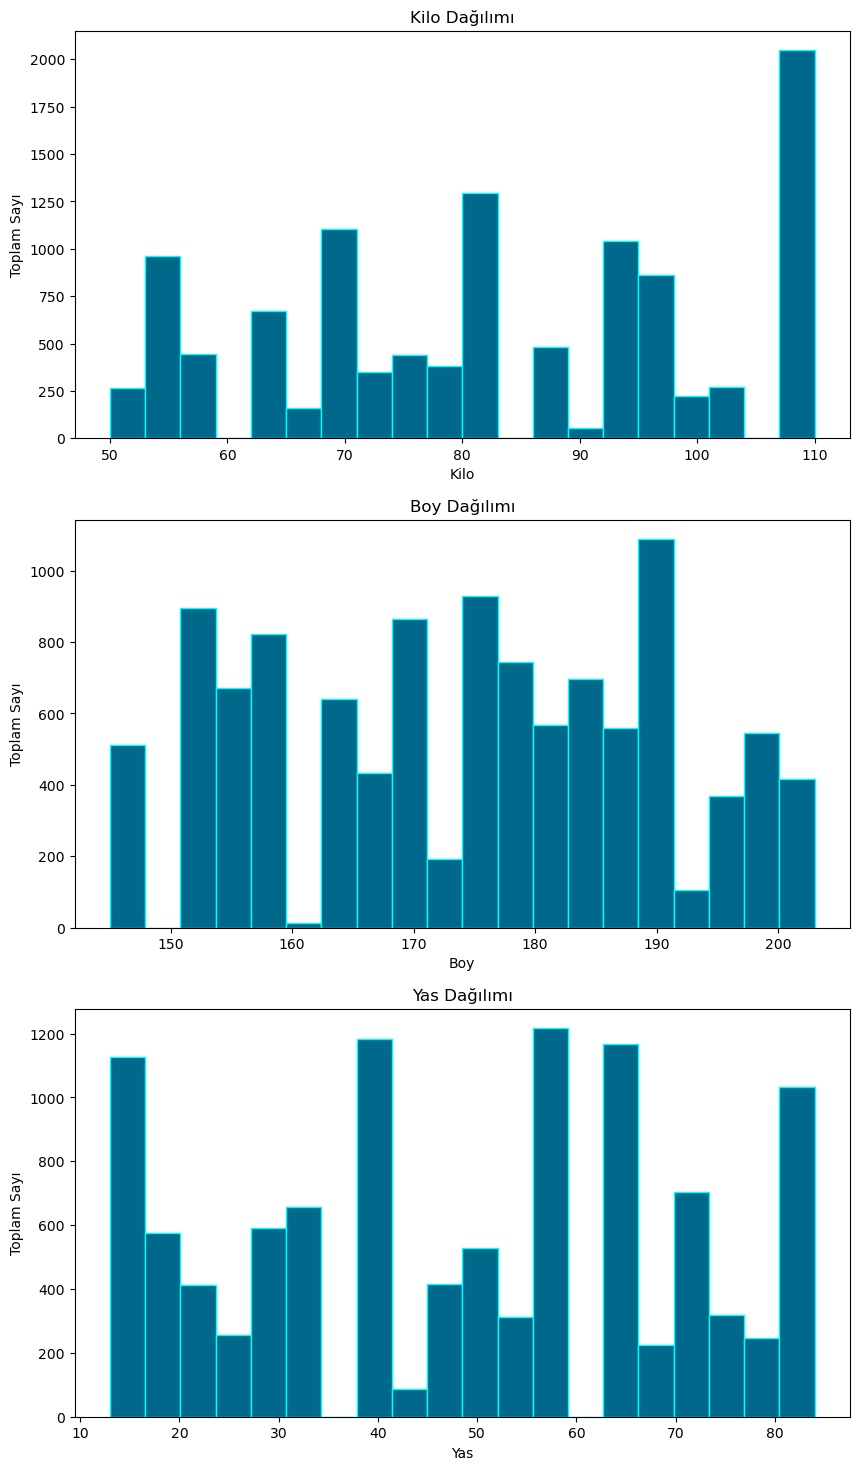

In [44]:
# İlgilenilen sütunlar
selected_columns = ['Kilo', 'Boy', 'Yas' ]

# Seçilen sütunların histogram çizimi
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 6 * len(selected_columns)))

for i, column in enumerate(selected_columns):
    axes[i].hist(side_effect_data[column], bins=20, color='#00688b', ec='#00ffff')
    axes[i].set_title(f'{column} Dağılımı')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Toplam Sayı')
plt.show()